In [10]:
import numpy as np
import matplotlib.pylab as plt
plt.rcParams.update({'font.size': 12})

import cristalo as cr

# Pole Figure angles

In [14]:
def create_fig():
    """ Create axes for the pole figure """
    psi = np.arange(0, 85+1, 5)
    psi_stereo = 2*np.tan(psi*np.pi/180 / 2) # Stereographic projection


    fig = plt.figure(figsize=(6, 6));
    ax = fig.add_subplot(111, projection='polar');

    ax.set_rmin(0)
    ax.set_rorigin(-0.01)
    ax.set_ylim((0, 2))
    ax.set_yticks(psi_stereo[::3])
    ax.set_yticklabels([f'{a}°' for a in psi[::3]],
                       alpha=0.4, color='black')
    ax.grid(True, alpha=0.4, color='black')

    return fig, ax


def annotate(ax, phi, psi, hkl, color='k', marker='s', fontweight='normal'):
    """ Add hkl annotation for the given (phi, psi) point """
    hkl_name = get_hlk_name(hkl)
    psi_stereo = 2*np.tan(psi*np.pi/180 / 2) # <-- Stereographic projection
    
    # corrections for correct placement of labels
    psi_stereo_annotate = psi_stereo if psi_stereo>0.1 else 0.1 
    phi_annotate = phi if np.abs(phi)>1 else 1
    phi_annotate = phi_annotate if np.abs(np.abs(phi_annotate)-180)>1 else 179 
    
    if psi_stereo>2:
        print(hkl, psi_stereo, psi)
    
    ax.plot(phi *np.pi/180, psi_stereo, marker=marker, color=color)
    ax.annotate(hkl_name, (phi_annotate *np.pi/180, psi_stereo),
                textcoords='offset pixels', xytext=(0, -15),
                rotation=0, alpha=0.9, color=color, family='sans-serif',
                horizontalalignment='center', va='baseline', weight=fontweight) 
    
    
def get_hlk_name(hkl):
    """ Convert hkl tuple to a string """
    return '%s%s%s' % tuple(hkl)

In [17]:
# --- Define sample orientation relative to the cristal ---
n    = (1, 1, 2)   # sample surface normal direction
phi0 = (1, -1, 0)  # direction corresponding to phi=0 (X axis)

# Direction to look at:
dirs = [(1, 1, 1), (1, -1, 1), (-1, 1, 1),
        (1, 1, 3), (1, -1, 3), (3, -1, 1), (3, 1, -1), (-1, 1, 3), (1, 3, 1), (1, 3, -1),
        (1, 3, 3), (3, -1, 3), (3, 3, -1),
        (0, 0, 2), (0, 2, 0), (2, 0, 0),
        (2, 2, 0), (2, 0, 2), (0, -2, 2), (0, 2, 2), (-2, 0, 2),
        (2, 2, 2), (2, -2, 2), (-2, 2, 2)]

hkl 	 phi  	 psi  multiplicity
------------------------------
111 	 270°  	  19°   6
1-11 	  22°  	  62°   6
-111 	 158°  	  62°   6
113 	  90°  	  10°   2
1-13 	  51°  	  42°   2
3-11 	 348°  	  61°   2
31-1 	 296°  	  76°   2
-113 	 129°  	  42°   2
131 	 231°  	  42°   2
13-1 	 244°  	  76°   2
133 	 202°  	  21°   2
3-13 	  12°  	  41°   2
33-1 	 270°  	  68°   2
002 	  90°  	  35°   8
020 	 219°  	  66°   8
200 	 321°  	  66°   8
220 	 270°  	  55°   4
202 	 360°  	  30°   4
0-22 	  59°  	  73°   4
022 	 180°  	  30°   4
-202 	 121°  	  73°   4
222 	 270°  	  19°   6
2-22 	  22°  	  62°   6
-222 	 158°  	  62°   6


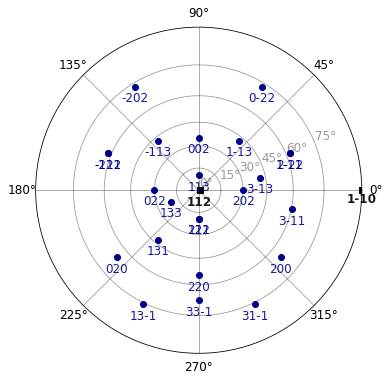

In [18]:
# -- Graph Pole Figure & Table of angles  -- 
fig, ax = create_fig();

# add annotation for sample's axis:
annotate(ax, *cr.get_phi_psi(n, n, phi0), n,
         color='black', marker='s', fontweight='bold')
annotate(ax, *cr.get_phi_psi(phi0, n, phi0), phi0,
         color='black', marker='s', fontweight='bold')

# loop over directions
print('hkl', f'\t phi ', f'\t psi ', 'multiplicity') 
print('-' * 30)
for hkl in dirs:
    phi, psi = cr.get_phi_psi(hkl, n, phi0)
    annotate(ax, phi, psi, hkl,
             color='darkblue', marker='o')
    
    hkl_name = get_hlk_name(hkl)
    multiplicity = 48/len(cr.equivalent_directions(hkl))
    
    phi = phi if phi > 0 else 360+phi
    print(hkl_name, f'\t{phi:>4.0f}° ', f'\t{psi:>4.0f}° ', f'{multiplicity:>2.0f}')